In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np

In [4]:
spy = yf.Ticker('SPY')

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [25]:
#utilities and functions

def get_sp_data(start='2008-01-01', end=None, save=False):
    # Get the current SP components, and get a tickers list
    sp_assets = pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    assets = sp_assets['Symbol'].str.replace('.', '-').tolist()
    # Download historical data to a multi-index DataFrame
    try:
        data = yf.download(assets, start=start, end=end)
        if save:
            filename = save
            data.to_pickle(filename)
            print('Data saved at {}'.format(filename))
    except ValueError:
        print('Failed download, try again.')
        data = None
    return data


def transform_data_performers(df):
    comparisons = pd.concat([df.iloc[0].to_frame(), df.iloc[-1].to_frame()], axis=1)
    comparisons["PnL"] = comparisons[comparisons.columns[1]] - comparisons[comparisons.columns[0]] 
    #It's justified to simply ignore the NaNs here because those come from stocks that were not available at the period start date. These would not be purchaseable anyway, so they can be neglected.
    return comparisons


def best_performers(budget, n, df):
    #return up to n best performers based on the available budget
    df = transform_data_performers(df)
    
    df.sort

    pass

In [27]:
all_prices = get_sp_data('2021-01-01')
df = all_prices['Open']

[*********************100%%**********************]  503 of 503 completed


In [ ]:
class eSim:
    def __init__(self, plan):
        self._plan = plan

In [58]:
comparisons = pd.concat([df.iloc[0].to_frame(), df.iloc[-1].to_frame()], axis=1)
comparisons["PnL"] = comparisons[comparisons.columns[1]] - comparisons[comparisons.columns[0]] 

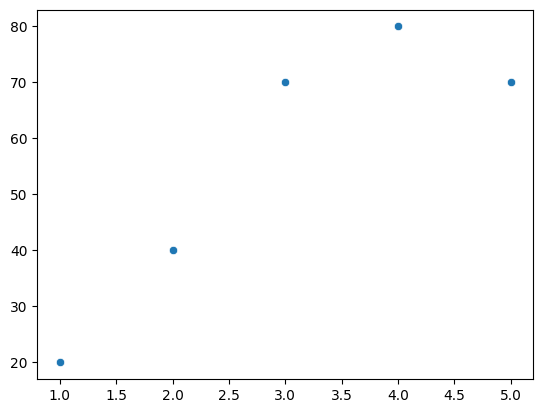